# BeerAdvocate

In [48]:
import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
importlib.reload(utils)

<module 'utils' from '/Users/arimongomis/Desktop/EPFL/ADA/ada-2024-project-mediterranean/src/preprocessing/utils.py'>

# Data processing

### Beers

In [49]:
beers_adv = pd.read_csv("../../data/BeerAdvocate/beers.csv", sep=",")

In [50]:
utils.dataset_information(beers_adv, "Beers_BA")



########################################################
We are starting analysing dataset Beers_BA
- Dimension of starting dataset: (280823, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id            brewery_name  \
0   166064    Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
1   166065     Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   
2   166066  Nashe Shakhterskoe       39912  Abdysh-Ata (Абдыш Ата)   
3   166067  Nashe Zhigulevskoe       39912  Abdysh-Ata (Абдыш Ата)   
4   166063              Zhivoe       39912  Abdysh-Ata (Абдыш Ата)   

             style  nbr_

Ensurance of correct data types:

In [51]:
utils.ensure_col_types(beers_adv,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_reviews', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [52]:
beers_adv.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


Keep only beers that have atleast one review and one rating. Only beers that have been tried are wanted

In [53]:
beers_adv_filt = beers_adv[(beers_adv['nbr_ratings'] != 0) & (beers_adv['nbr_reviews'] != 0)].copy()

In [54]:
beers_adv_filt['nbr_ratings'].describe()

count    166649.000000
mean         49.216653
std         298.336124
min           1.000000
25%           2.000000
50%           5.000000
75%          17.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

In [55]:
beers_adv_filt['nbr_reviews'].describe()

count    166649.000000
mean         15.539163
std          88.846266
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3899.000000
Name: nbr_reviews, dtype: float64

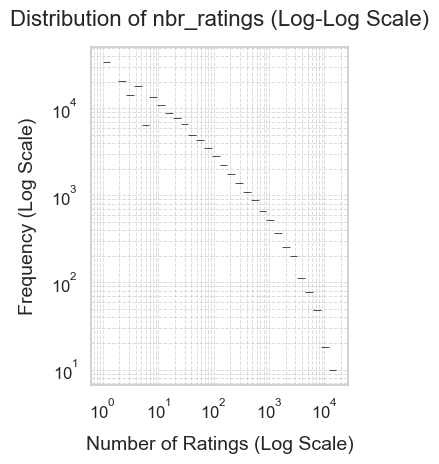

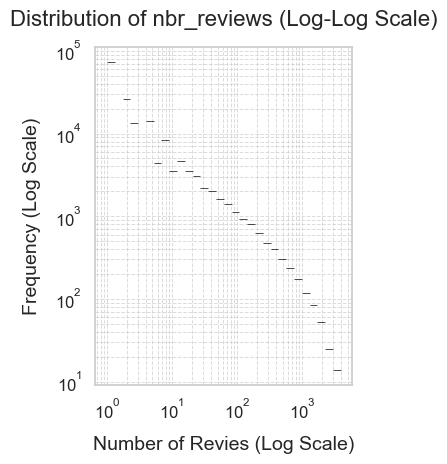

In [56]:
plt.subplot(121)
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_ratings (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

plt.subplot(122)
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_reviews'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Revies (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_reviews (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Duplicates dealing:

In [57]:
print(beers_adv_filt['beer_id'].duplicated().any())

duplicates = beers_adv_filt['beer_id'].duplicated()
duplicates.describe()

False


count     166649
unique         1
top        False
freq      166649
Name: beer_id, dtype: object

In [58]:
duplicated_beer_id_rows = beers_adv_filt[beers_adv_filt['beer_id'].duplicated(keep=False)]
duplicated_beer_id_rows.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings


Once seen that duplications are repeated entries they can be removed easily:

In [59]:
beers_adv_filt_unique = beers_adv_filt.drop_duplicates(subset='beer_id', keep='first').reset_index(drop=True)

utils.dataset_information(beers_adv_filt_unique, "Filtered + Unique Beers_BA")



########################################################
We are starting analysing dataset Filtered + Unique Beers_BA
- Dimension of starting dataset: (166649, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id  \
0   142544               Régab       37262   
1    19590       Barelegs Brew       10093   
2    19827            Legbiter       10093   
3    20841   St. Patrick's Ale       10093   
4    20842  St. Patrick's Best       10093   

                                brewery_name             style  nbr_ratings  \
0  Societe des Brasseries du Gabon (SOBRAGA)   Euro Pale Lager         

In [60]:
beers_adv_filt_unique['beer_id'].duplicated().describe()

count     166649
unique         1
top        False
freq      166649
Name: beer_id, dtype: object

### Breweries

In [61]:
breweries_adv = pd.read_csv("../../data/BeerAdvocate/breweries.csv", sep=",")

In [62]:
utils.dataset_information(breweries_adv, "Breweries_BA")



########################################################
We are starting analysing dataset Breweries_BA
- Dimension of starting dataset: (16758, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False
Head: 
       id    location                    name  nbr_beers
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
1  39913  Kyrgyzstan             Arpa (АРПА)          1
2  39914  Kyrgyzstan               Bear Beer          4
3  39915  Kyrgyzstan             Blonder Pub          4
4  39916  Kyrgyzstan            Kellers Bier          2


In [63]:
breweries_adv['nbr_beers'].describe()

count    16758.000000
mean        21.056331
std         69.417841
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1196.000000
Name: nbr_beers, dtype: float64

Drop breweries with null `nbr_beers`:

In [64]:
breweries_adv_filt = breweries_adv[(breweries_adv['nbr_beers'] != 0)].copy()
breweries_adv_filt['nbr_beers'].describe()
breweries_adv_filt.reset_index(drop=True, inplace=True)
breweries_adv_filt = breweries_adv_filt.drop(columns=['index'], errors='ignore')
breweries_adv_filt.head(10)

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
5,16052,Kyrgyzstan,Steinbrau Pub,4
6,39917,Kyrgyzstan,Usu-Salkin Pivo,3
7,37262,Gabon,Societe des Brasseries du Gabon (SOBRAGA),1
8,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5
9,32848,Northern Ireland,The Sheelin Brewery,4


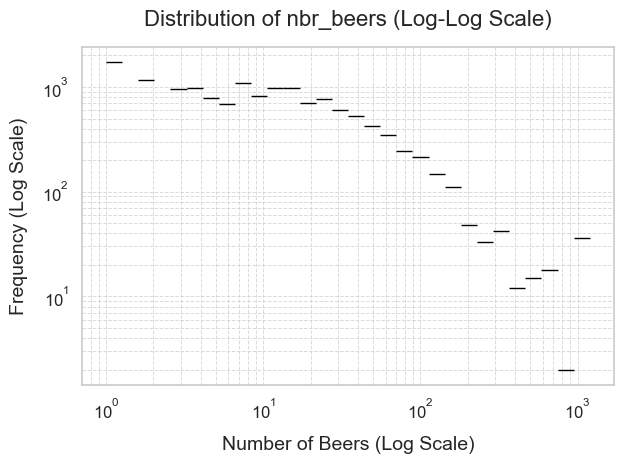

In [65]:
sns.set_theme(style="whitegrid")
sns.histplot(breweries_adv_filt['nbr_beers'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Beers (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_beers (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Location analysis:

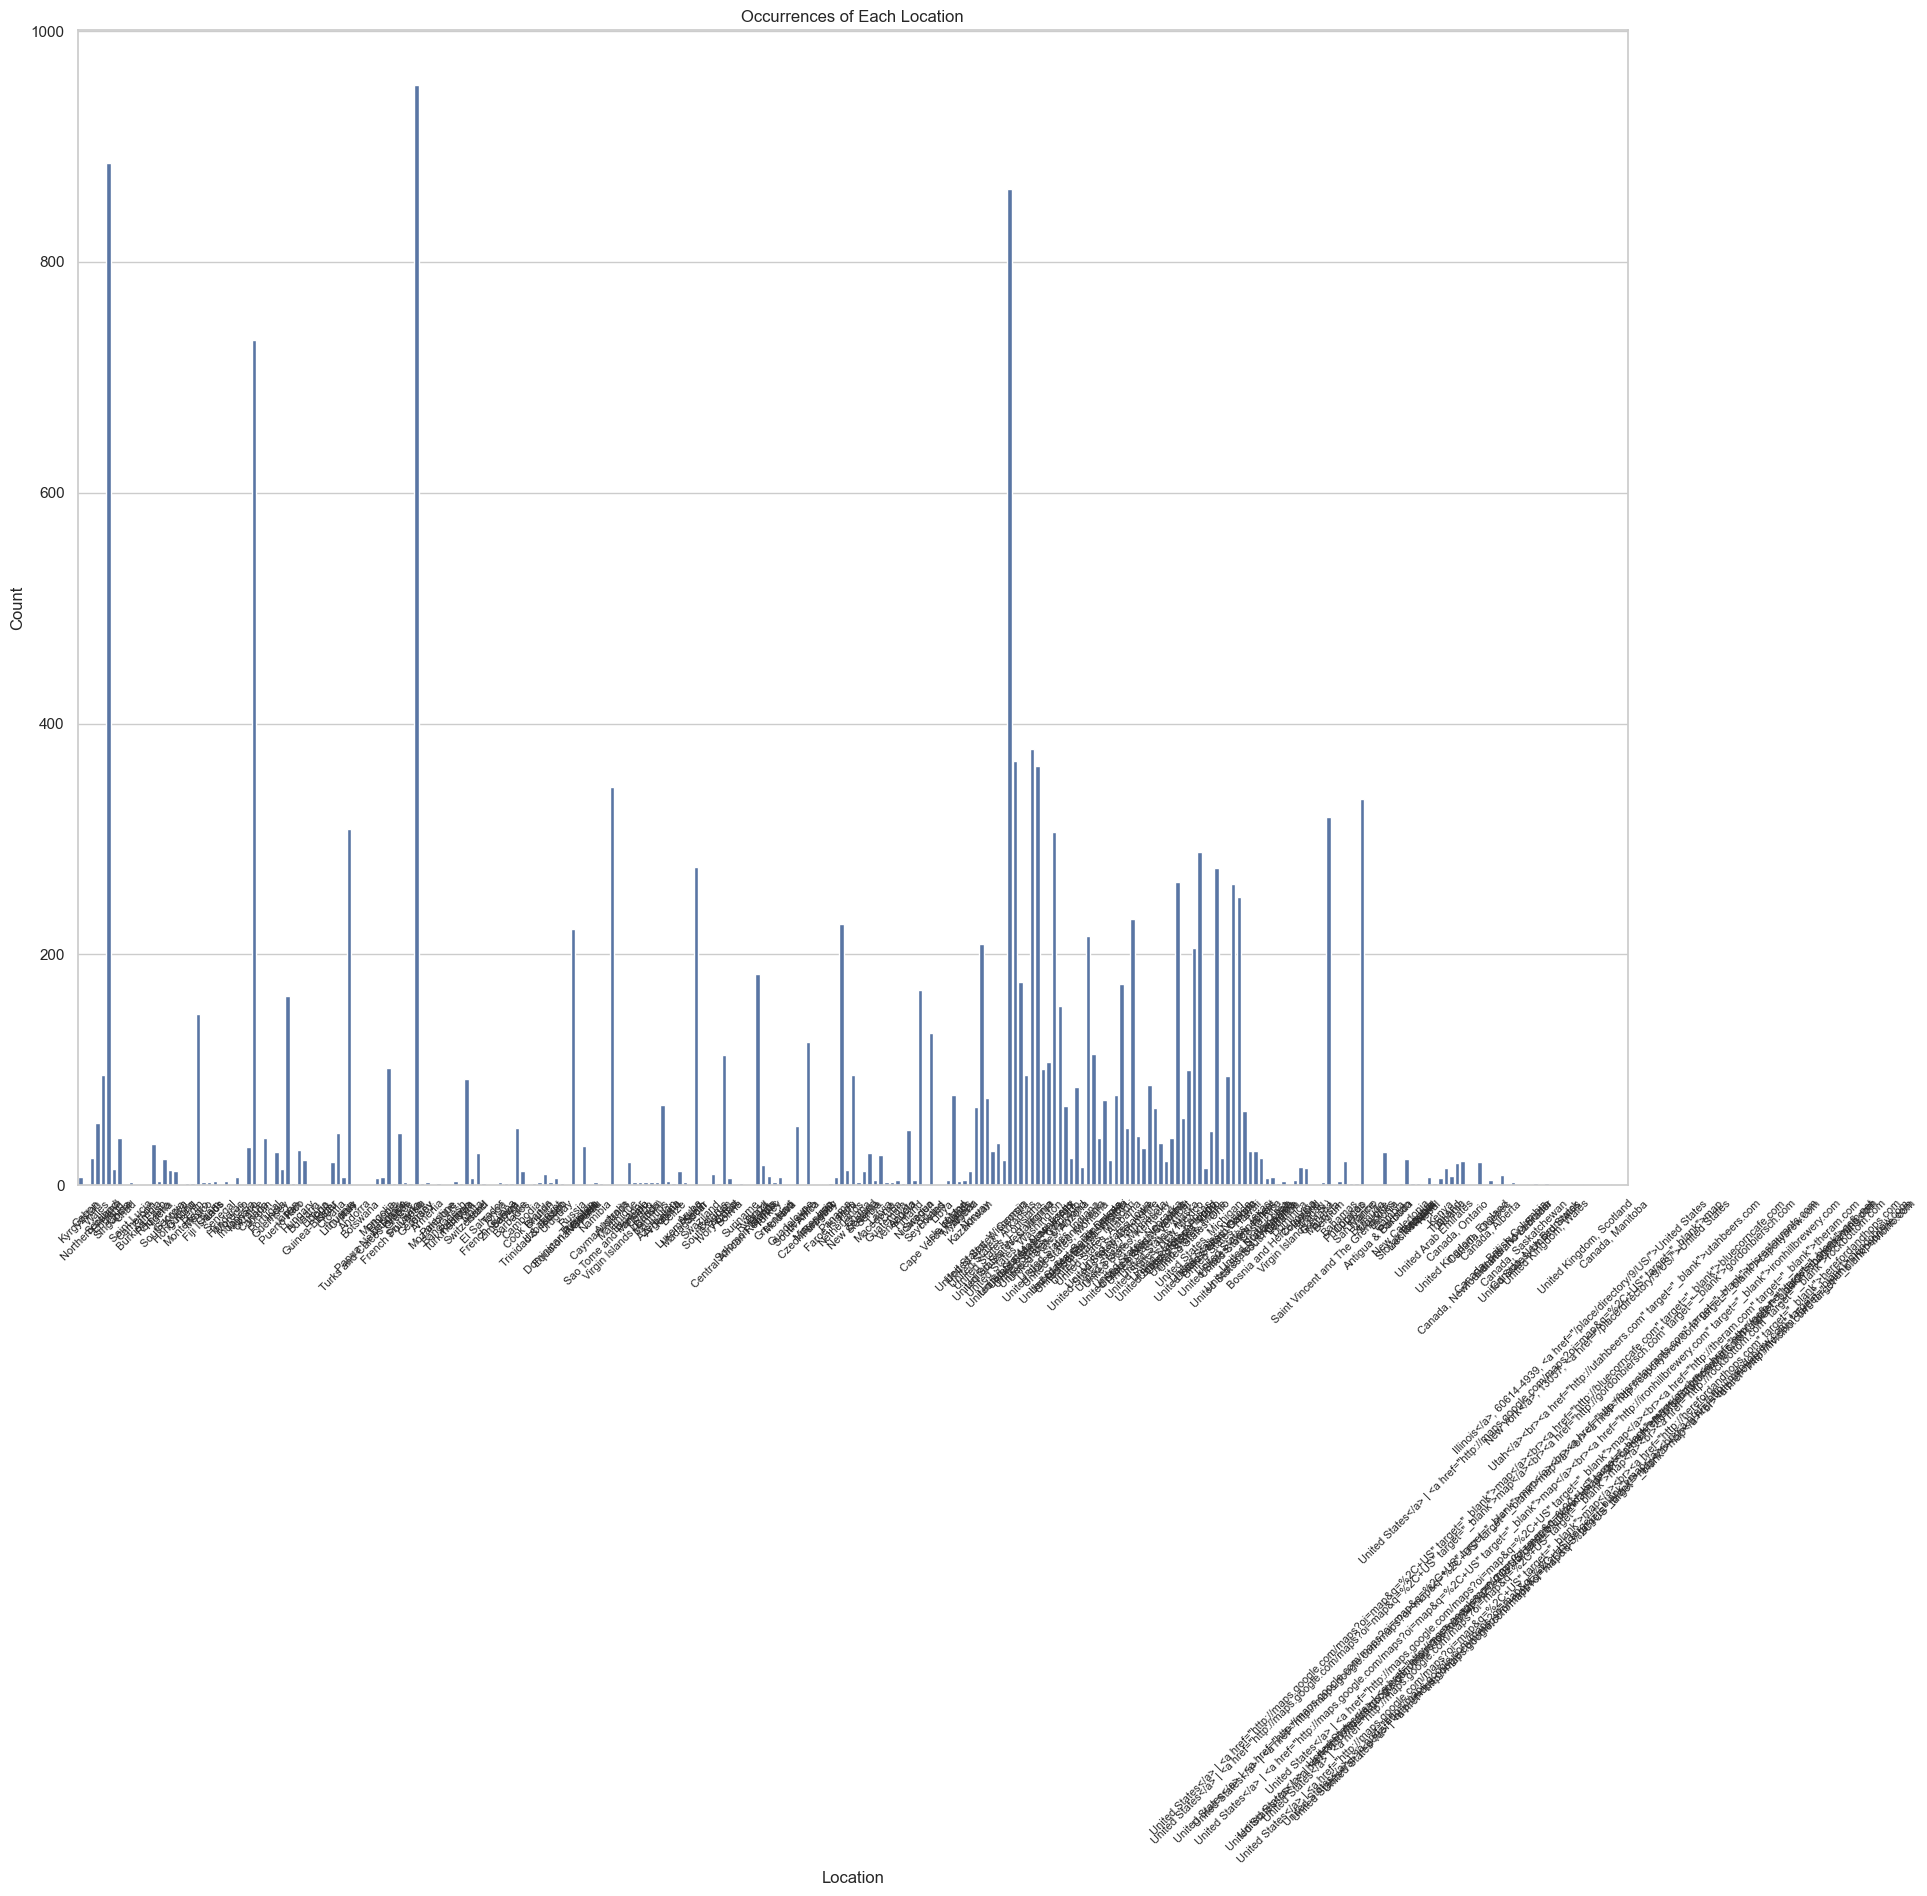

In [66]:
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Eliminate links added

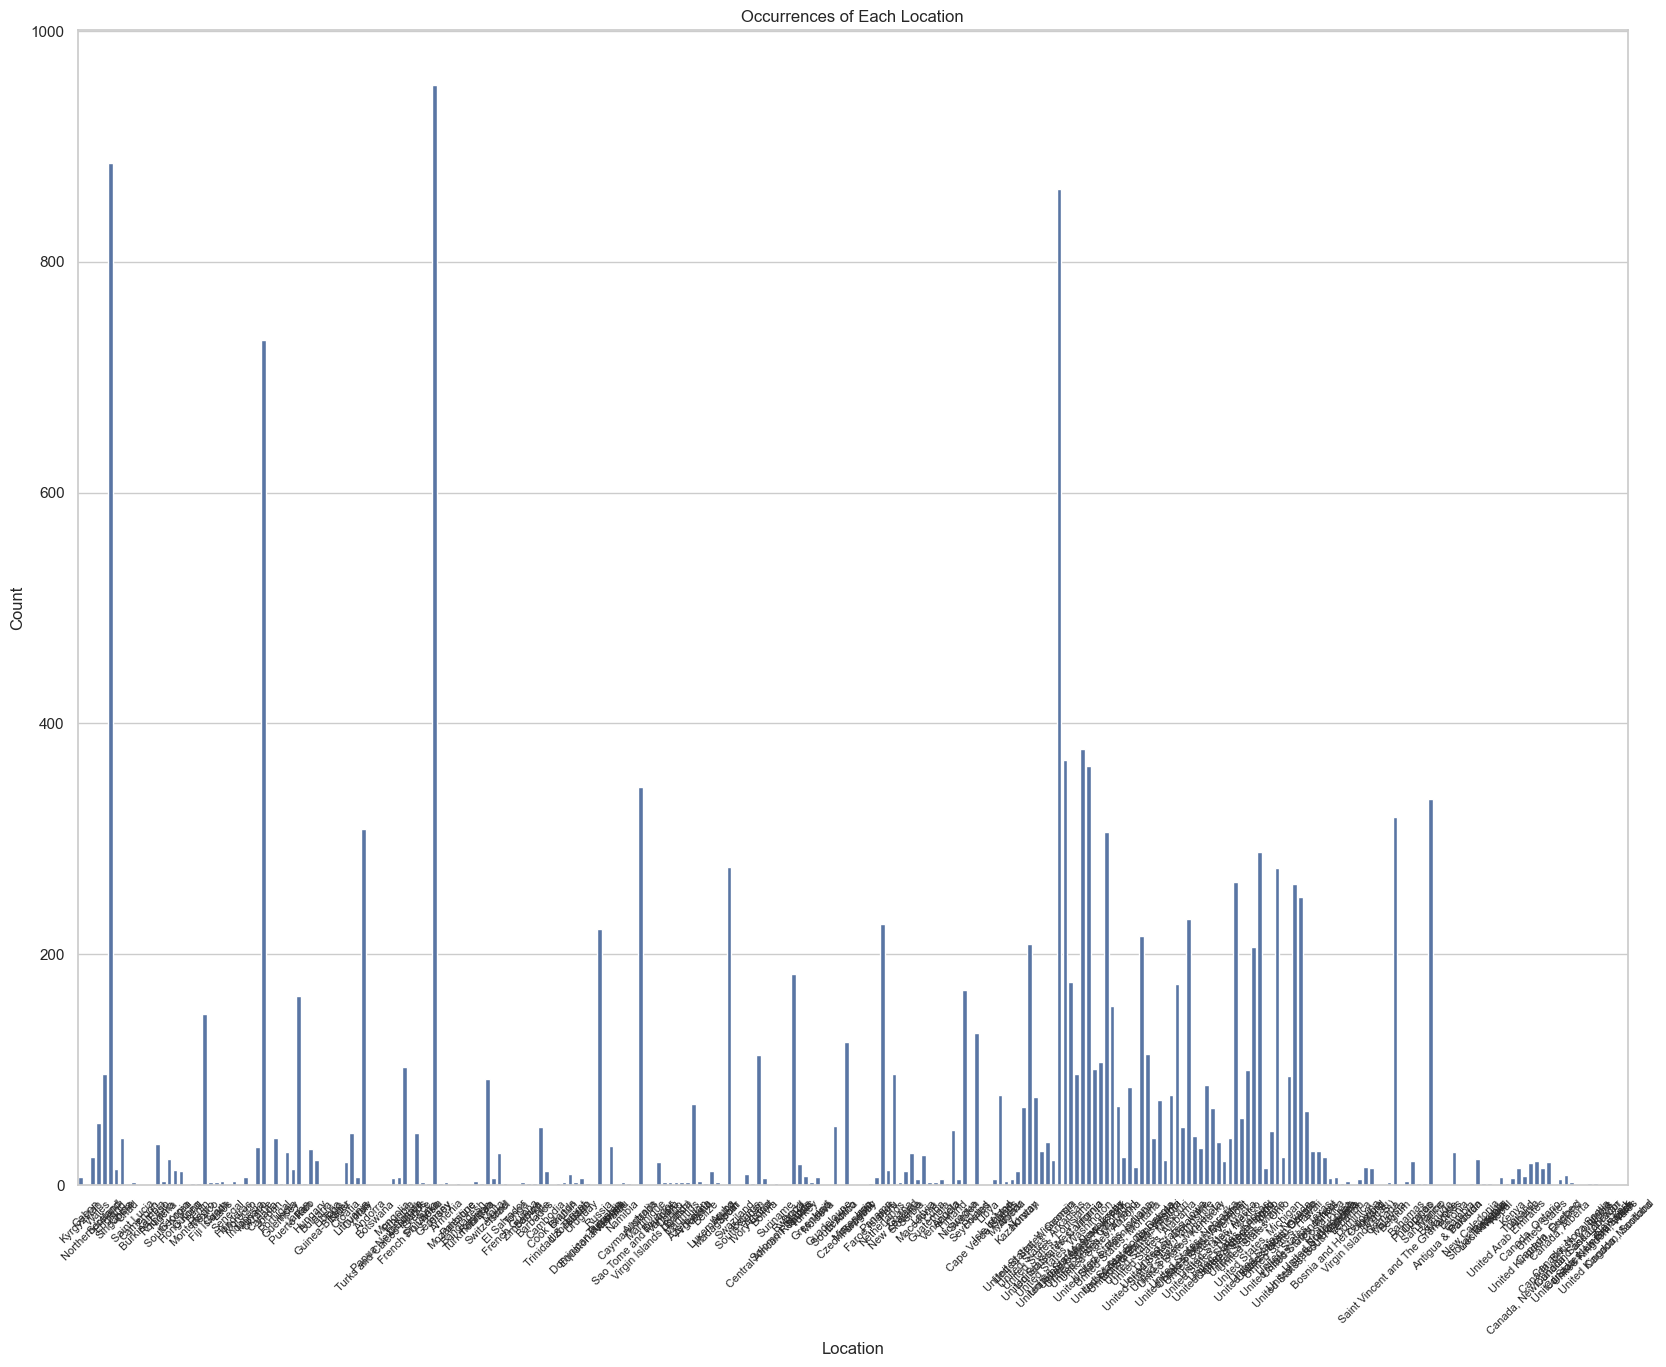

In [67]:
breweries_adv_filt['link'] = breweries_adv_filt['location'].str.contains("href", case=False, na=False)
breweries_adv_filt.loc[breweries_adv_filt['link'] == True, 'location'] = breweries_adv_filt['location'].str.split('<').str[0]
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Lets start by dividing the locations regions ",":

In [68]:
breweries_adv_filt[['location', 'location_region']] = breweries_adv_filt['location'].str.split(',', n=1, expand=True)
breweries_adv_filt['location'] = breweries_adv_filt['location'].str.strip()
breweries_adv_filt.reset_index(drop = True, inplace=False)
breweries_adv_filt = utils.update_location_and_region(breweries_adv_filt)
breweries_adv_filt['location_region'] = breweries_adv_filt['location_region'].str.strip()
breweries_adv_filt.head(20)

,id,location,name,nbr_beers,link,location_region
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,False,None
1,39913,Kyrgyzstan,Arpa (АРПА),1,False,None
2,39914,Kyrgyzstan,Bear Beer,4,False,None
3,39915,Kyrgyzstan,Blonder Pub,4,False,None
4,39916,Kyrgyzstan,Kellers Bier,2,False,None
5,16052,Kyrgyzstan,Steinbrau Pub,4,False,None
6,39917,Kyrgyzstan,Usu-Salkin Pivo,3,False,None
7,37262,Gabon,Societe des Brasseries du Gabon (SOBRAGA),1,False,None
8,10093,United Kingdom,Strangford Lough Brewing Company Ltd,5,False,Northern Ireland
9,32848,United Kingdom,The Sheelin Brewery,4,False,Northern Ireland


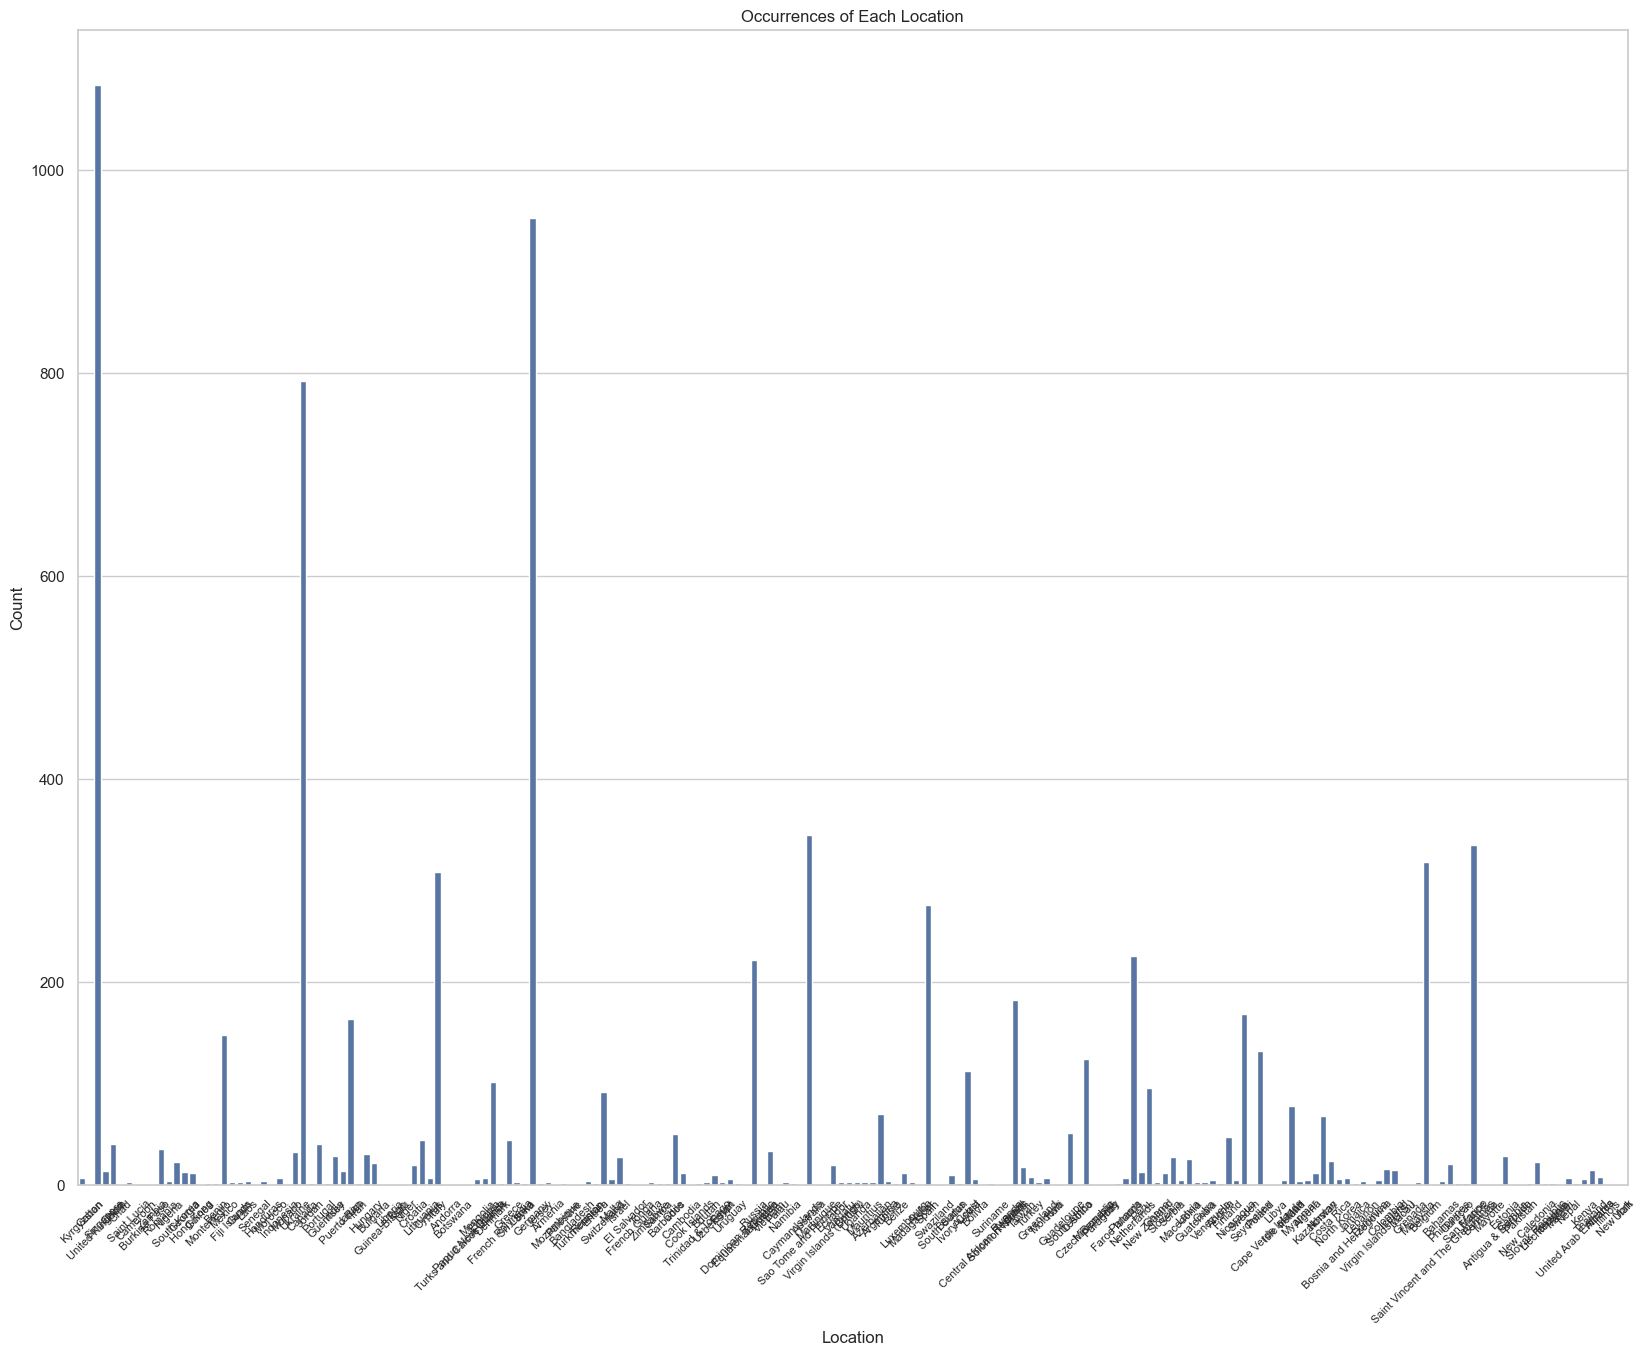

In [69]:
# Location frequency distribution without US
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['location'] != 'United States'], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Lest divide US, Canada and UK into location and region:

In [70]:
breweries_adv_filt['US'] = breweries_adv_filt['location'].str.contains("United States", case=False, na=False)
breweries_adv_filt['UK'] = breweries_adv_filt['location'].str.contains("United Kingdom", case=False, na=False)
breweries_adv_filt['Canada'] = breweries_adv_filt['location'].str.contains("Canada", case=False, na=False)

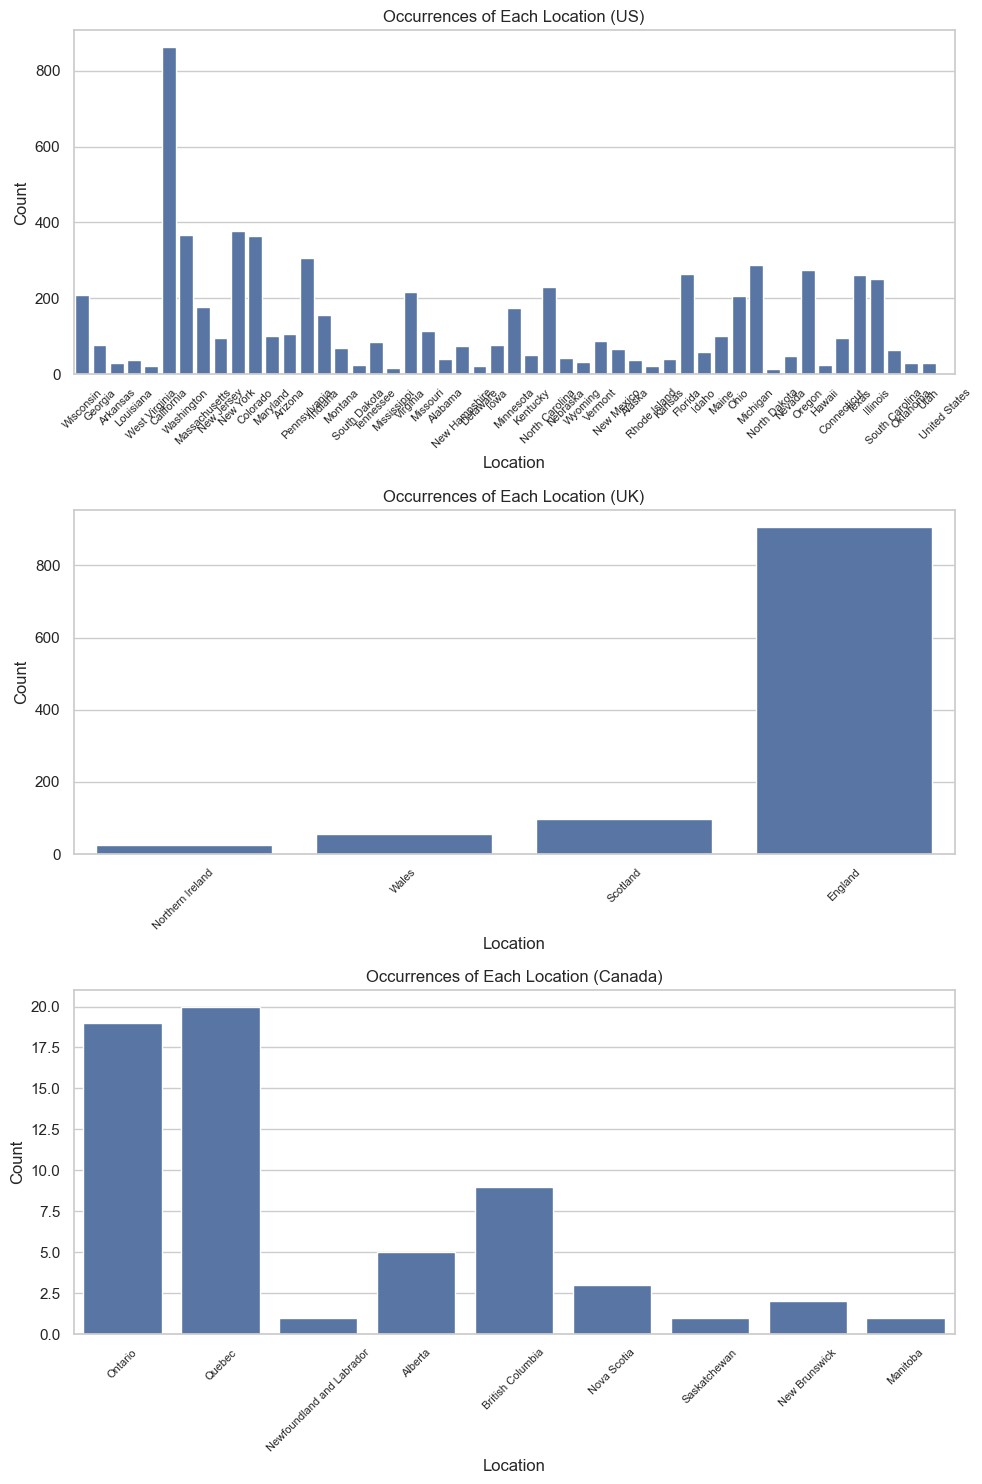

In [71]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['US'] == True], x='location_region', ax=axes[0])
axes[0].set_title('Occurrences of Each Location (US)')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=breweries_adv_filt[breweries_adv_filt['UK'] == True], x='location_region', ax=axes[1])
axes[1].set_title('Occurrences of Each Location (UK)')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=breweries_adv_filt[breweries_adv_filt['Canada'] == True], x='location_region', ax=axes[2])
axes[2].set_title('Occurrences of Each Location (Canada)')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

In [72]:
breweries_adv_filt = breweries_adv_filt.drop(columns='link', errors='ignore')
breweries_adv_filt.head()

,id,location,name,nbr_beers,location_region,US,UK,Canada
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,None,False,False,False
1,39913,Kyrgyzstan,Arpa (АРПА),1,None,False,False,False
2,39914,Kyrgyzstan,Bear Beer,4,None,False,False,False
3,39915,Kyrgyzstan,Blonder Pub,4,None,False,False,False
4,39916,Kyrgyzstan,Kellers Bier,2,None,False,False,False


In [73]:
for i in range(len(breweries_adv_filt)):
    loc = breweries_adv_filt.loc[i,'location']
    if (',' in loc) or ('<' in loc) or ('|' in loc):
        print(loc)

Let's check for duplicates:

In [74]:
print(breweries_adv_filt['id'].duplicated().any())

duplicates = breweries_adv_filt['id'].duplicated()
duplicates.describe()

False


count     14522
unique        1
top       False
freq      14522
Name: id, dtype: object

Now we can merge the location column information to the beers dataset already processed:

In [75]:
breweries_adv_filt.rename(columns={'name': 'brewery_name'}, inplace=True)

beers_adv_filt_unique_location = beers_adv_filt_unique.merge(
    breweries_adv_filt[['brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_name',
    how='left'
)

beers_adv_filt_unique_location.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,location_region,US,UK,Canada
0,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,1,2.88,NaN,NaN,4.5,2.880000,NaN,0,NaN,Gabon,None,False,False,False
1,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,4.5,3.845000,NaN,0,NaN,United Kingdom,Northern Ireland,False,True,False
2,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,80.0,80.0,4.8,3.439867,-0.649167,59,3.504068,United Kingdom,Northern Ireland,False,True,False
3,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,NaN,NaN,6.0,3.888750,0.093110,6,3.768333,United Kingdom,Northern Ireland,False,True,False
4,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,82.0,90.0,4.2,3.556094,-0.478579,48,3.580417,United Kingdom,Northern Ireland,False,True,False


In [76]:
print(len(beers_adv_filt_unique_location))

202137


### Users

In [77]:
users_adv = pd.read_csv("../../data/BeerAdvocate/users.csv", sep=",")

In [78]:
utils.dataset_information(users_adv, "Users_BA")



########################################################
We are starting analysing dataset Users_BA
- Dimension of starting dataset: (153704, 6)
- Columns of dataset:  Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

         joined                   location  
0  1.199704e+09  United States, Washington  
1  1.191838e+09    United States, New York  
2  1.116410e+09           Northern Ire

We need to deal with `joined` and `location`:

* `joined`: usage of datetime functions of `pandas` to transform the seconds into proper date structure.
* `location`: same approach as breweries and beers datasets. Division into `location`, `location_region` and booleans for quick identification of US, UK and Canada cases. 

In [79]:
users_adv['joined'] = pd.to_datetime(users_adv['joined'], unit='s')

users_adv[['location', 'location_region']] = users_adv['location'].str.split(',', n=1, expand=True)

print(users_adv['user_id'].duplicated().describe())

pattern = r"\bUnited Kingdom\b|\bEngland\b|\bScotland\b|\bWales\b|\bNorthern Ireland\b"

users_adv['US'] = users_adv['location'].str.contains("United States", case=False, na=False)
users_adv['UK'] = users_adv['location'].str.contains(pattern, case=False, na=False)
users_adv['Canada'] = users_adv['location'].str.contains("Canada", case=False, na=False)
users_adv.loc[users_adv['location_region'] == "United States", 'location_region'] = np.nan
users_adv=utils.update_location_and_region(users_adv)

users_adv.head()

count     153704
unique         1
top        False
freq      153704
Name: user_id, dtype: object


,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,location_region,US,UK,Canada
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,United States,Washington,True,False,False
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,United States,New York,True,False,False
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,United Kingdom,Northern Ireland,False,True,False
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,United Kingdom,Northern Ireland,False,True,False
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,United Kingdom,Northern Ireland,False,True,False


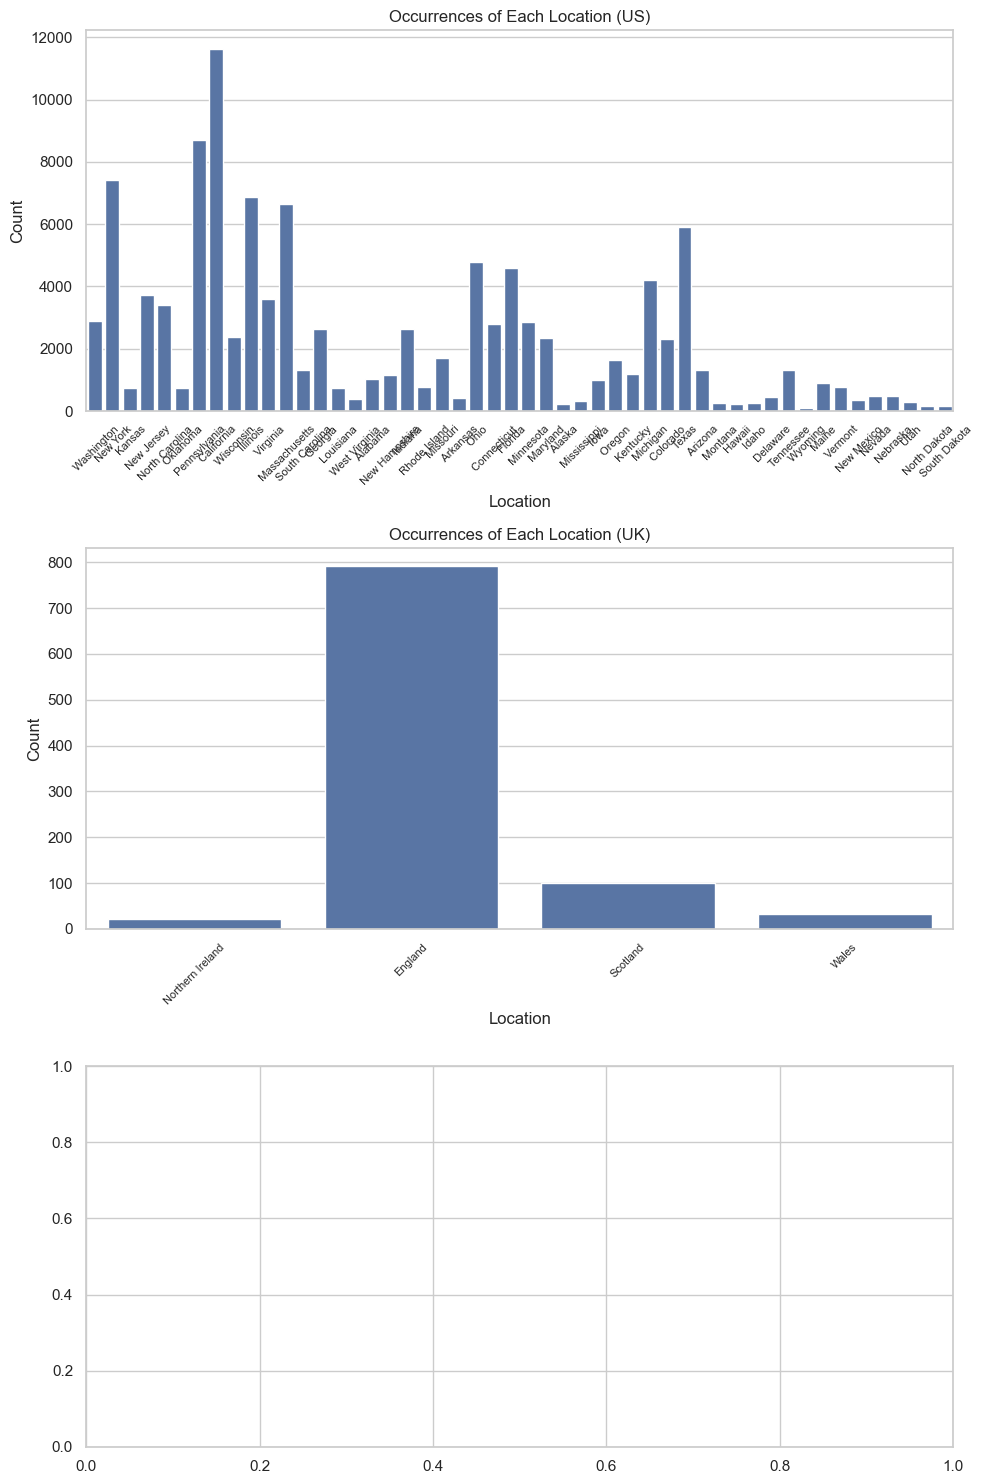

In [80]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.countplot(data=users_adv[users_adv['US'] == True], x='location_region', ax=axes[0])
axes[0].set_title('Occurrences of Each Location (US)')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=users_adv[users_adv['UK'] == True], x='location_region', ax=axes[1])
axes[1].set_title('Occurrences of Each Location (UK)')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

"""
No regions in canada
sns.countplot(data=users_adv[users_adv['Canada'] == True], x='location_region', ax=axes[2])
axes[2].set_title('Occurrences of Each Location (Canada)')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)
"""

plt.tight_layout()
plt.show()

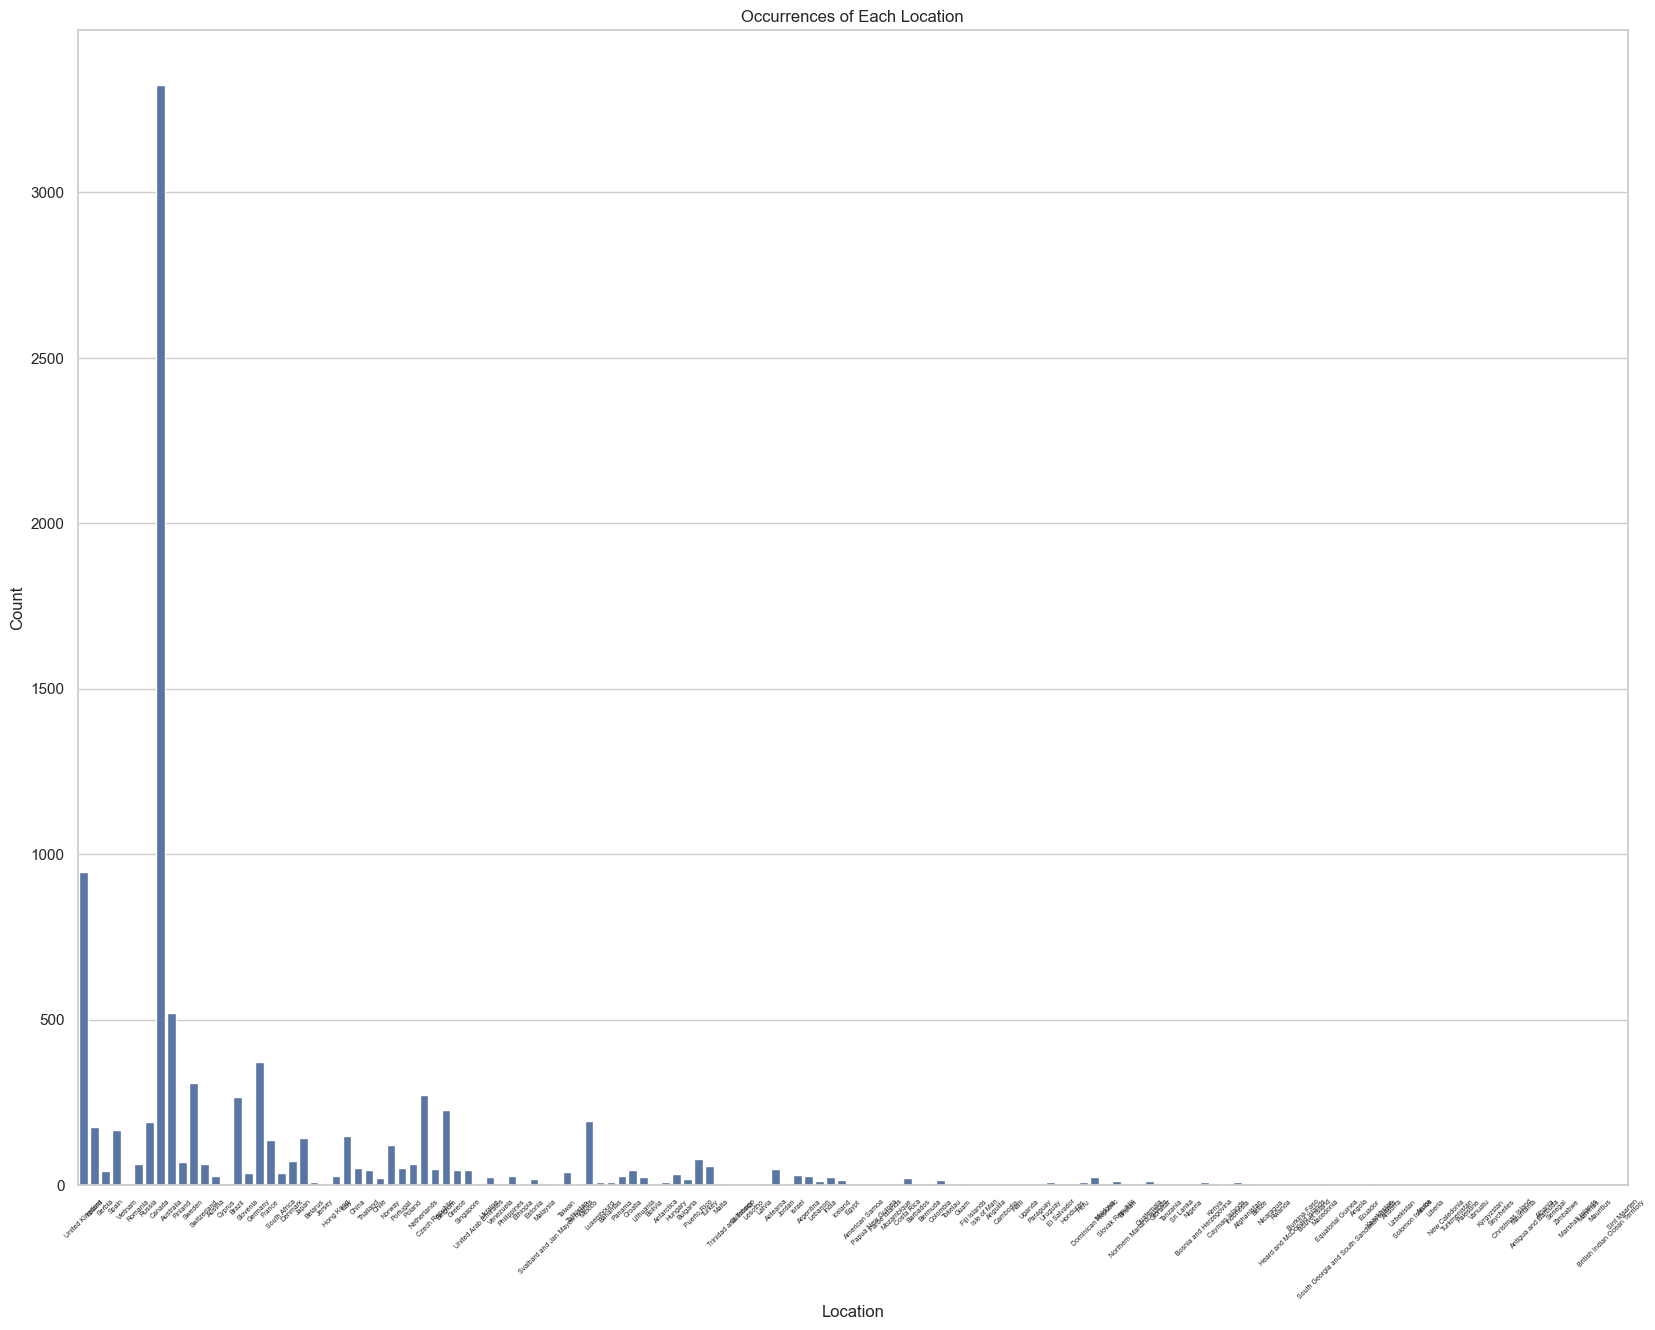

In [81]:
plt.figure(figsize=(20, 15))
sns.countplot(data=users_adv[users_adv['US'] == False], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=5) 
plt.show()

### Ratings

In [82]:
"""
file_path = "../../data/Original/BeerAdvocate/reviews.txt"
ratings_adv = []

with open(file_path, "r", encoding="utf-8") as file:
    current_rating = {} 
    
    for line in file:
        line = line.strip()  
        if ": " in line:  
            key, value = line.split(": ", 1)
            current_rating[key] = value  
        elif not line:  
            if current_rating:
                ratings_adv.append(current_rating)
                current_rating = {}  
    if current_rating:
        ratings_adv.append(current_rating)

ratings_adv = pd.DataFrame(ratings_adv)
ratings_adv.head()
"""

'\nfile_path = "../../data/Original/BeerAdvocate/reviews.txt"\nratings_adv = []\n\nwith open(file_path, "r", encoding="utf-8") as file:\n    current_rating = {} \n    \n    for line in file:\n        line = line.strip()  \n        if ": " in line:  \n            key, value = line.split(": ", 1)\n            current_rating[key] = value  \n        elif not line:  \n            if current_rating:\n                ratings_adv.append(current_rating)\n                current_rating = {}  \n    if current_rating:\n        ratings_adv.append(current_rating)\n\nratings_adv = pd.DataFrame(ratings_adv)\nratings_adv.head()\n'

## Processed savings

In [ ]:
utils.write_csv_into_directory('../../data/BeerAdvocate', 'beers_processed.csv', beers_adv_filt_unique_location)
utils.write_csv_into_directory('../../data/BeerAdvocate', 'breweries_processed.csv', breweries_adv_filt)
utils.write_csv_into_directory('../../data/BeerAdvocate', 'users_processed.csv', users_adv)

Dataset successfully saved to data/BeerAdvocate/beers_processed.csv
Dataset successfully saved to data/BeerAdvocate/breweries_processed.csv
Dataset successfully saved to data/BeerAdvocate/users_processed.csv
